## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [12]:
import pandas as pd
import numpy as np

police = pd.read_csv('police_killings.csv', encoding = 'ISO-8859-1')
print (police.head(2))

#total counts for racial grouping
race_ethnicity = police['raceethnicity'].value_counts()

#Calculate the relative values 
def cal_relative_values(lst, total):
    relative_values = []
    
    for value in lst:
        value = value/total
        
        relative_values.append(value)
        
    return relative_values


values = [236, 135, 67, 15, 10, 4] 

race = ['White', 'Black', 'Hispanic/Latino', 'Unknown', 'Asian/Pacific Islander', 'Native American']

#dictionary that contains relative values
rel_values = cal_relative_values(values, 467)
lists = dict(zip(race, rel_values))
print (lists)

#The population by race in the US is broken down as follows:
'''
White = 61.6%
Black = 13.3%
Hispanic/latino = 17.6%
Asian = 5.6%
Native Hawaiian and other pacific Islander = 0.2%
Native American = 1.2%
'''

                 name age gender raceethnicity     month  day  year  \
0  A'donte Washington  16   Male         Black  February   23  2015   
1      Aaron Rutledge  27   Male         White     April    2  2015   

            streetaddress       city state    ...     share_hispanic  \
0            Clearview Ln  Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr  Pineville    LA    ...                0.5   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0          54766     0.937936            3.0         3.0   
1     14678   27972.0          40930     0.683411            2.0         1.0   

    pov     urate   college  
0  14.1  0.097686  0.168510  
1  28.8  0.065724  0.111402  

[2 rows x 34 columns]
{'Unknown': 0.032119914346895075, 'Hispanic/Latino': 0.14346895074946467, 'Black': 0.2890792291220557, 'White': 0.5053533190578159, 'Asian/Pacific Islander': 0.021413276231263382, 'Native American': 0.00856531049250

### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

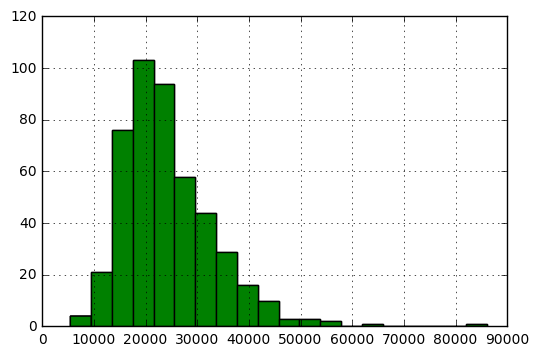

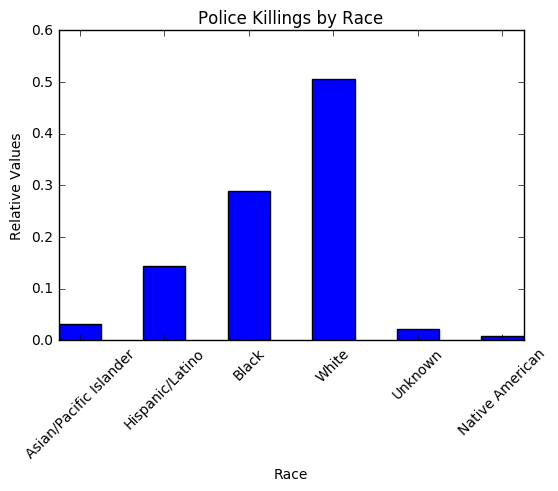

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange


fig, ax = plt.subplots()
bar_heights = (list(lists.values()))

bar_positions = arange(6) + 0.75
tick_positions = range(1,7)
ax.set_xticks(tick_positions)
ax.bar(bar_positions, bar_heights, 0.5)
ax.set_xticklabels(['Asian/Pacific Islander', 'Hispanic/Latino','Black','White', 'Unknown', 'Native American'], rotation = 45)
ax.set_title("Police Killings by Race")
ax.set_ylabel("Relative Values")
ax.set_xlabel("Race")
plt.show()


In [56]:
police['p_income'][police['p_income']!= '-'].astype(int).hist(bins=20)

In [58]:
police['p_income'][police['p_income']!= '-'].astype(int).median()

22348.0

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [61]:
state_killings = police['state'].value_counts()
print (state_killings)

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
IL    11
WA    11
LA    11
NJ    11
OH    10
MD    10
NC    10
MO    10
SC     9
VA     9
MI     9
IN     8
AL     8
OR     8
PA     7
KY     7
NE     6
KS     6
TN     6
MN     6
MS     6
NM     5
UT     5
MA     5
WI     5
HI     4
ID     4
AR     4
NV     3
WV     2
DE     2
IA     2
MT     2
AK     2
CT     1
ME     1
NH     1
DC     1
WY     1
Name: state, dtype: int64


In [65]:
share_race = police[(police['share_white']!= '-')&
                    (police['share_black']!= '-')&
                    (police['share_hispanic']!= '-')
                    ]


In [66]:
police.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [67]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = share_race[share_race['state'].isin(lowest_states)]
hs = share_race[share_race['state'].isin(highest_states)]

In [70]:
columns = ['pop', 'county_income', 'share_white', 'share_black', 'share_hispanic']

ls[columns].astype(float).mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

In [71]:
hs[columns].astype(float).mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64